## Abstract 

This data contains information on the attributes of mushrooms and whether they are edible or poisonous. There are two main aims for this report. The aim of this report is to find out the best model performance.


## Context

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?  

## About this data


**Attribute Information**: (classes: edible=e, poisonous=p)

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises**: bruises=t,no=f

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment**: attached=a,descending=d,free=f,notched=n

**gill-spacing**: close=c,crowded=w,distant=d

**gill-size**: broad=b,narrow=n

**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape**: enlarging=e,tapering=t

**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type**: partial=p,universal=u

**veil-color**: brown=n,orange=o,white=w,yellow=y

**ring-number**: none=n,one=o,two=t

**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isnull().sum() # No missing value in this dataset. 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

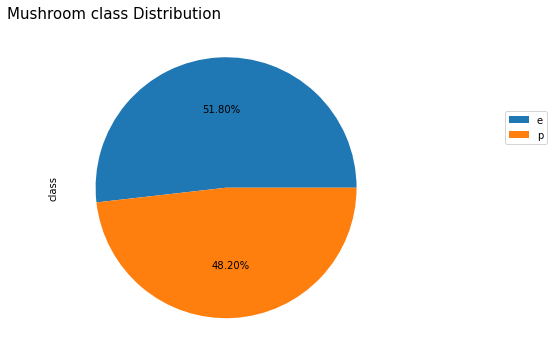

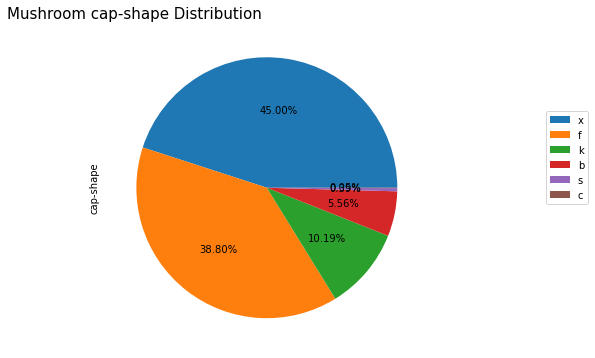

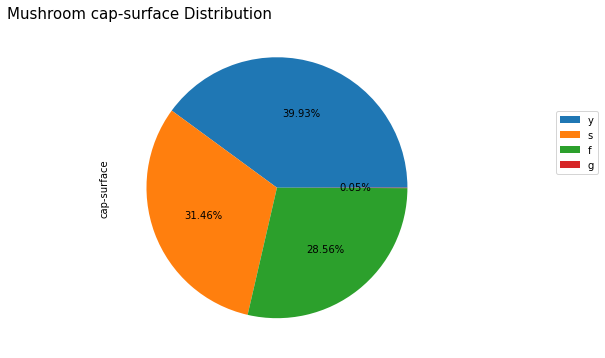

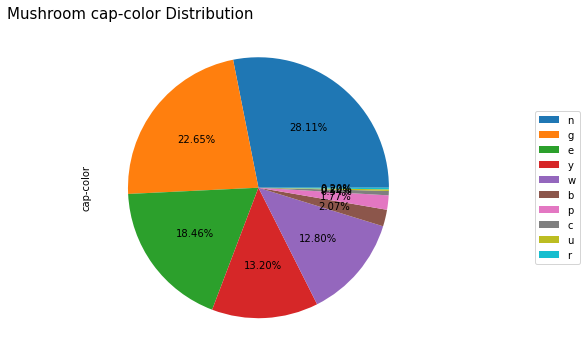

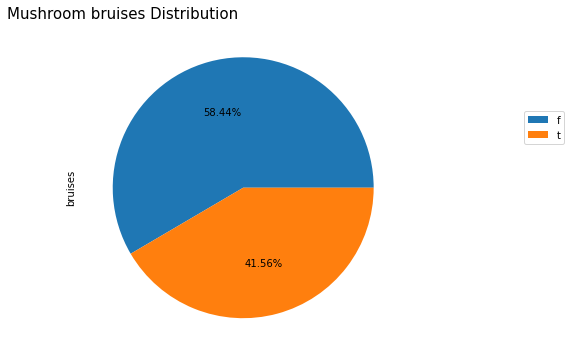

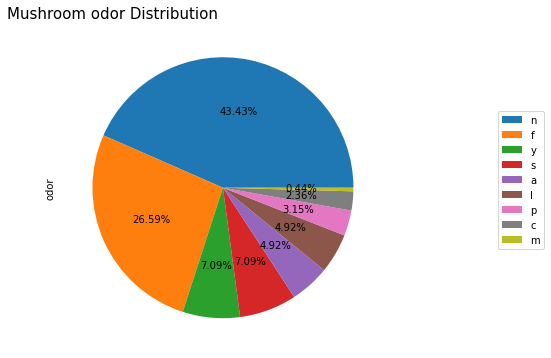

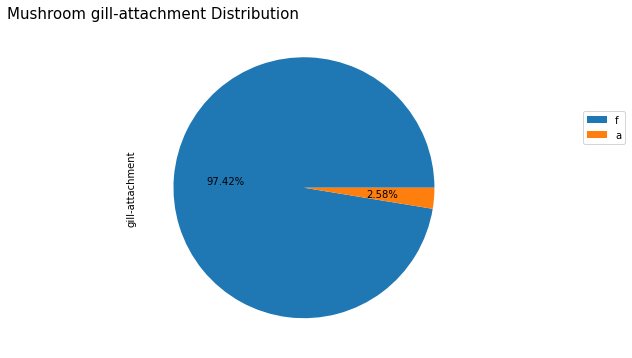

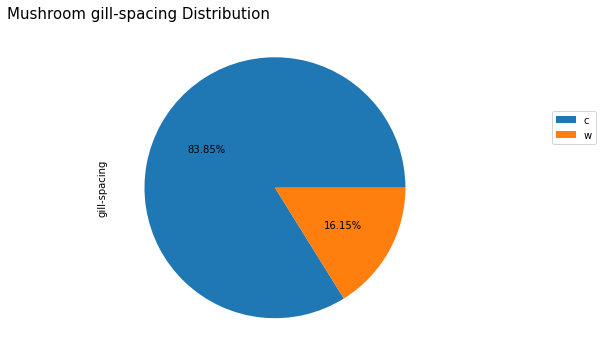

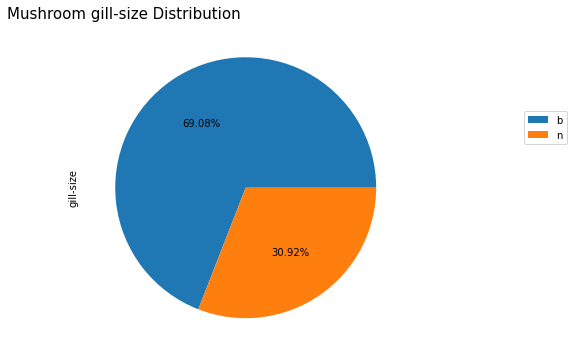

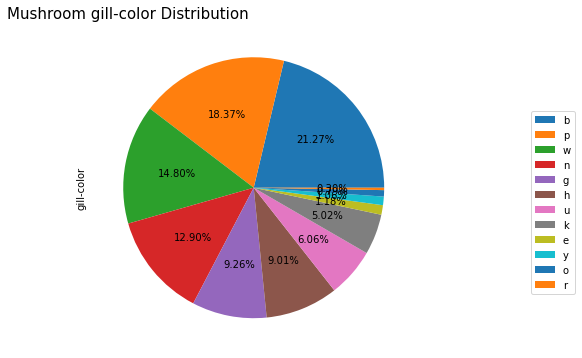

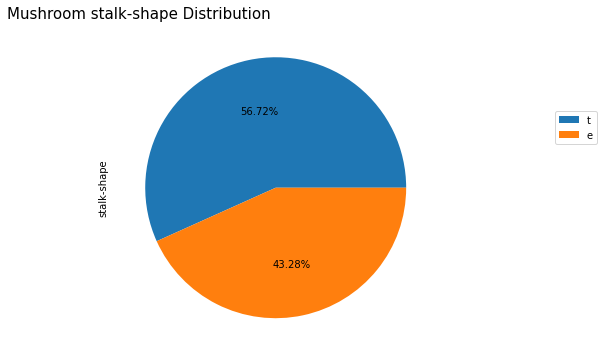

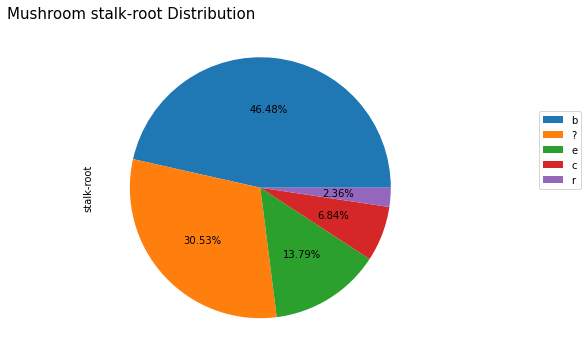

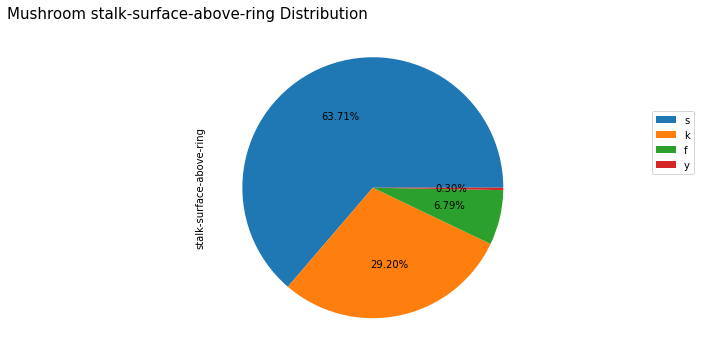

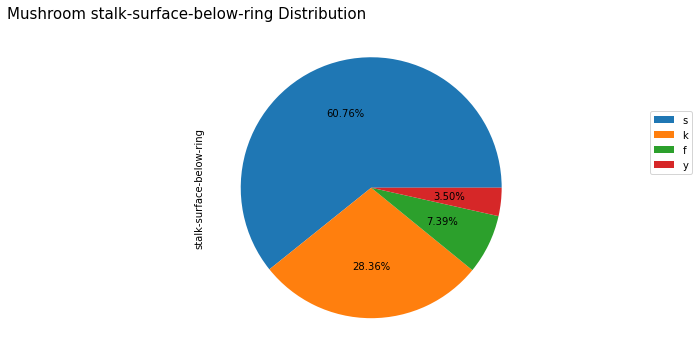

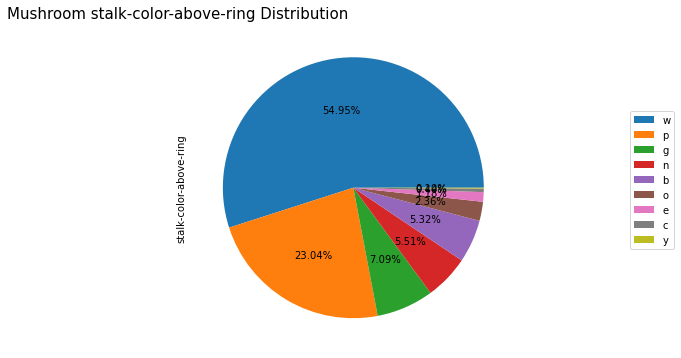

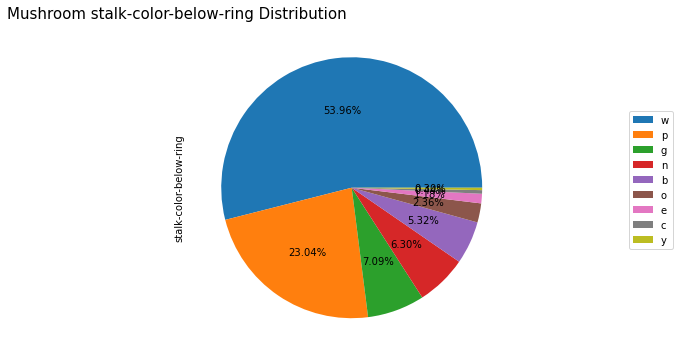

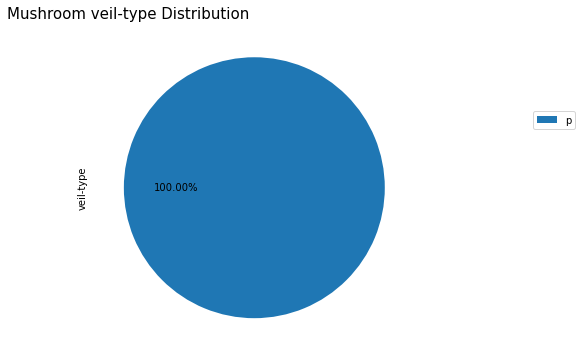

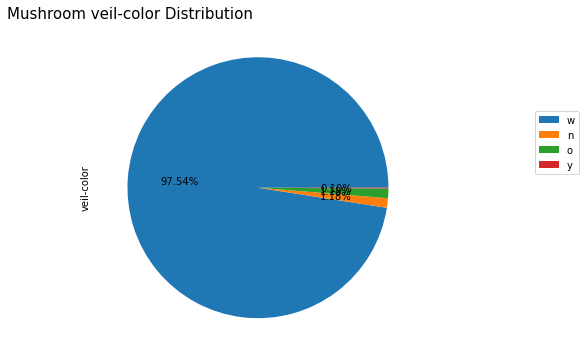

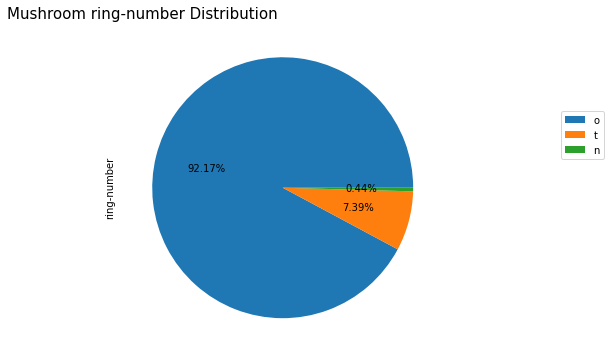

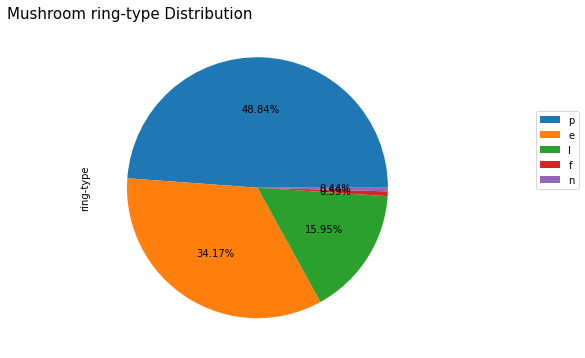

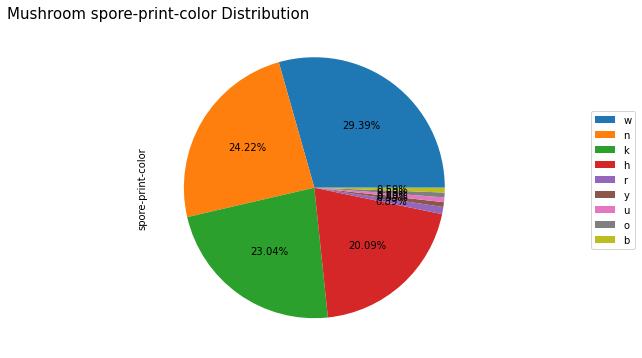

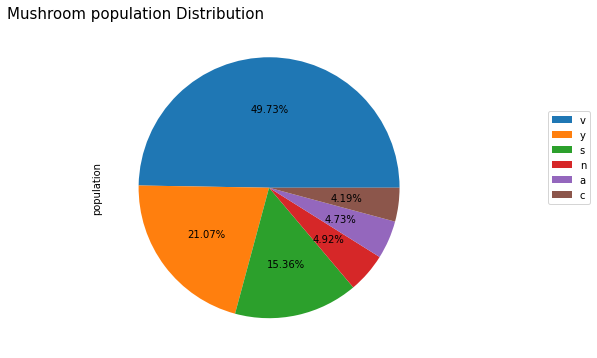

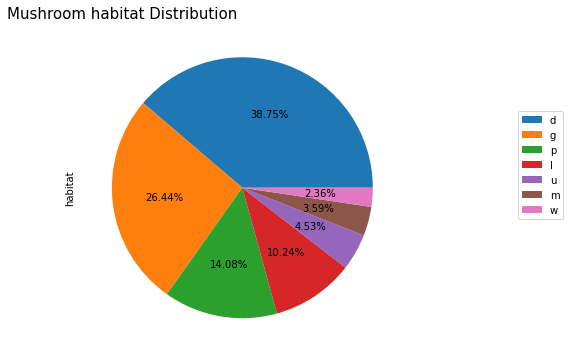

In [5]:
# visualise Mushroom's attributes
import matplotlib.pyplot as plt

for attribute in df.columns:
    df[attribute].value_counts().plot.pie(autopct='%.2f%%', figsize=(6,6),labels=None,subplots=True)
    plt.title("Mushroom {} Distribution ".format(attribute),fontsize=15,ha='right')
    plt.legend(labels=df[attribute].value_counts().index,bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()


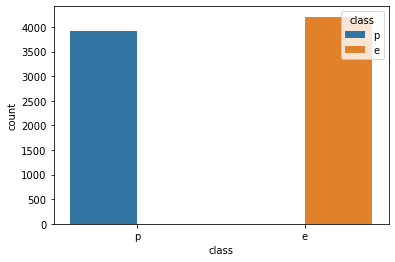

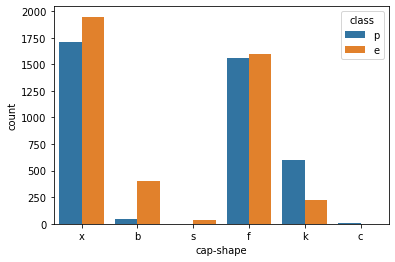

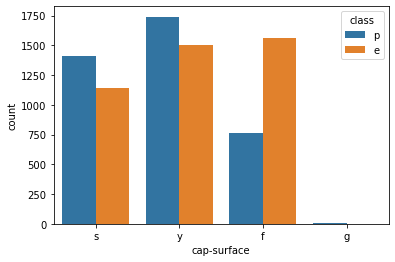

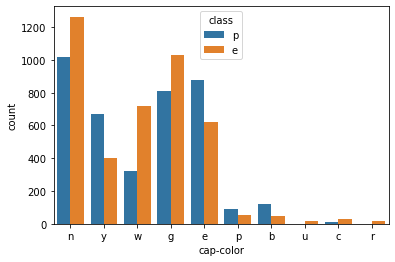

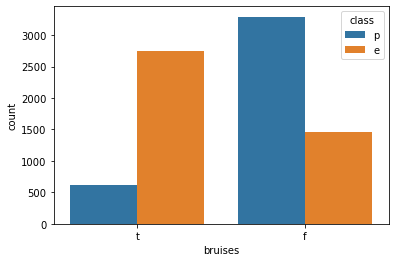

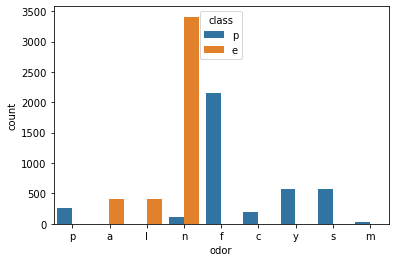

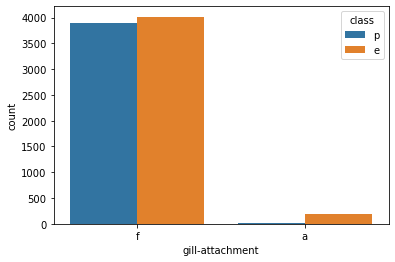

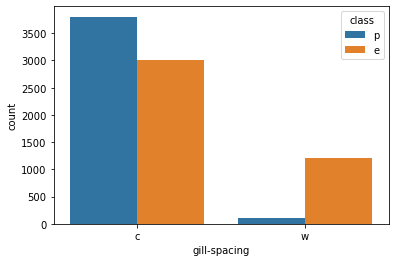

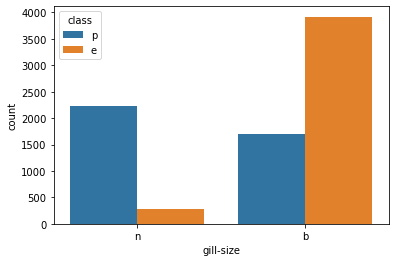

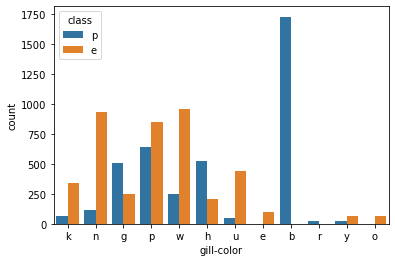

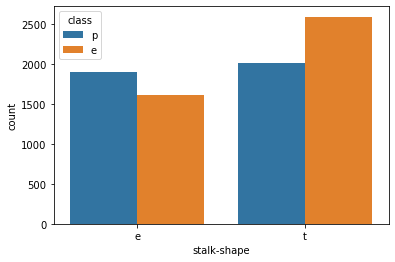

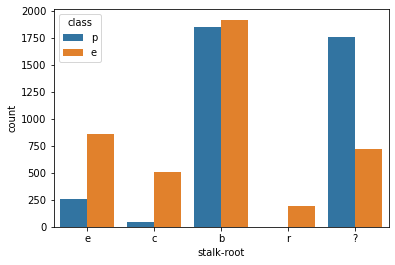

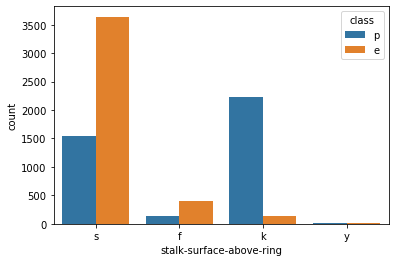

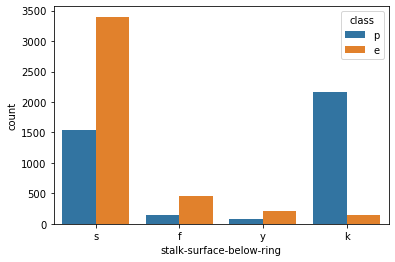

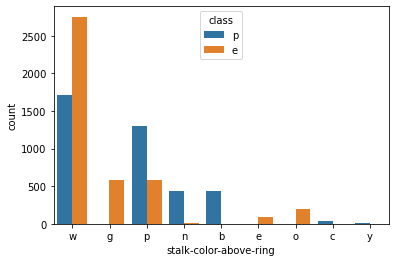

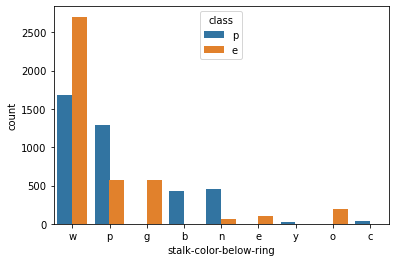

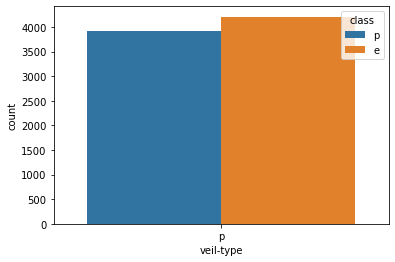

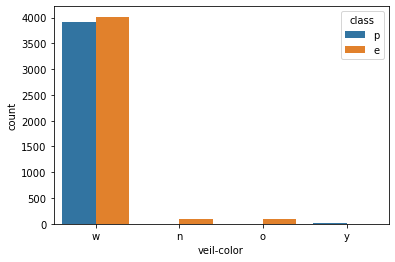

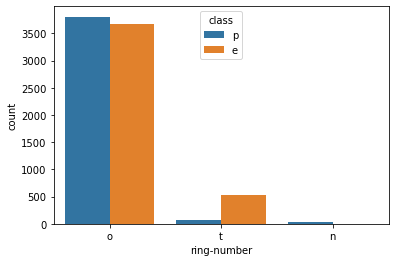

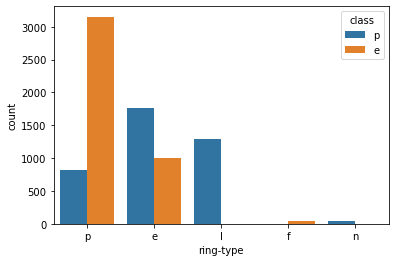

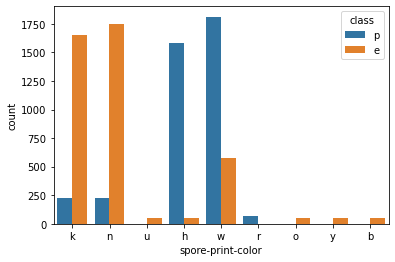

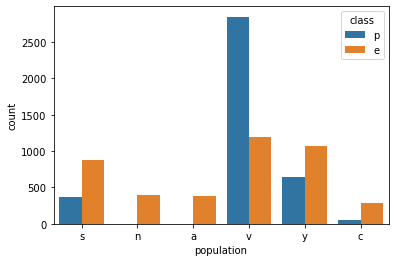

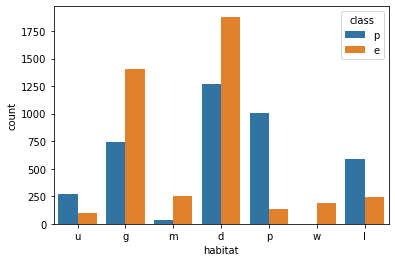

In [6]:
# visualise the relation between attributes and class.
import seaborn as sns

for attribute in df.columns:
    sns.countplot(x=attribute, hue = 'class', data=df)
    plt.show()

In [7]:
# use 'one-hot-encoding' here
# we consider e as 1 and p as 0 in class.

df1=df #df1 for one-hot-encoding
df1['class'] = df1['class'].replace({'e':1,'p':0})



In [8]:
from sklearn.preprocessing import OneHotEncoder

X = df1.iloc[:,1:]
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
y = df['class'].values
y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

### Machine Learning

In [10]:
# Split the data into train dataset and test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

#### 1. Linear Regression

In linear regression, I can only choose two attribute from the above graphs. 
I'm going to choose the attribute 'odor' and 'cap-shape'. The reason why I chose these two is that I can see that there is a relation between 'odor' and 'class' so the accuracy will be not too low.   
Whereas, I cannot see the relation between 'cap-shape' and 'class' so the accuracy will be quite low. So I will compare the accuracies.
so I'm going to use 'odor'.  
I also reset the X value for this case for one attribute 'odor'.

In [11]:
X1 = df1.iloc[:,1:]
X1 = X1[['odor']]
X1=pd.get_dummies(X1,columns=X1.columns,drop_first=True)
X2 = df1.iloc[:,1:]
X2 = X2[['cap-shape']]
X2=pd.get_dummies(X2,columns=X2.columns,drop_first=True)

X1, X2

(      odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  odor_y
 0          0       0       0       0       0       1       0       0
 1          0       0       0       0       0       0       0       0
 2          0       0       1       0       0       0       0       0
 3          0       0       0       0       0       1       0       0
 4          0       0       0       0       1       0       0       0
 ...      ...     ...     ...     ...     ...     ...     ...     ...
 8119       0       0       0       0       1       0       0       0
 8120       0       0       0       0       1       0       0       0
 8121       0       0       0       0       1       0       0       0
 8122       0       0       0       0       0       0       0       1
 8123       0       0       0       0       1       0       0       0
 
 [8124 rows x 8 columns],
       cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x
 0               0            0            0            0    

In [12]:
y = df['class'].values
y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [13]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=52)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=52)

In [14]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()  # Take linear regression model 
linear_regression_model.fit(X1_train, y_train)  # The model gets trained by the train data.

linear_regression_model2 = LinearRegression()  # Take linear regression model 
linear_regression_model2.fit(X2_train, y_train)  # The model gets trained by the train data.

LinearRegression()

In [17]:
y_test_predict = linear_regression_model.predict(X1_test)  # Predict from the trained data
y_test_predict2 = linear_regression_model2.predict(X2_test)  # Predict from the trained data

accuracy1 = linear_regression_model.score(X1_test, y_test)
accuracy2 = linear_regression_model2.score(X2_test, y_test)

accuracy1, accuracy2
print('Linear Regression Accuracy of using odor is {}% '.format(accuracy1*100))
print('Linear Regression Accuracy of using cap-shape is {}% '.format(accuracy2*100))

Linear Regression Accuracy of using odor is 94.28959847226128% 
Linear Regression Accuracy of using cap-shape is 5.458294114025208% 


Here, using 'odor' is pretty accurate, whereas, we can say the attribute 'cap-shape' is not related to the class at all.

#### 2. Multi-Linear Regression

Here, I'm going to use mulit-linear regression, which can be a bit better than linear regression.   
Let's see the result.

In [26]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_test_predict = linear_regression_model.predict(X_test)
accuracy = linear_regression_model.score(X_test, y_test)
accuracy
print('Multi-Linear Regression Accuracy is {}% '.format(accuracy*100))

Multi-Linear Regression Accuracy is 100.0% 


In this case of using multi-linear regression, it has 100% of accuracy. 

#### 3. Logistic Regression

Let's see the result of logistic regression if this is better than the previous ones.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrg = LogisticRegression()
lrg.fit(X_train, y_train)
y_pred = lrg.predict(X_test)
print('Logistic Regression Accuracy is {}% '.format(accuracy_score(y_test, y_pred)*100))

Logistic Regression Accuracy is 99.91796554552911% 


#### 4. Random Forest Classifier


In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc.predict(X_test)
print('Random Forest Classifier Accuracy is {}% '.format(accuracy_score(y_test, y_pred)*100))

Random Forest Classifier Accuracy is 92.65791632485644% 


#### 5. Adaboost


In [38]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Adaboost Accuracy is {}% '.format(accuracy_score(y_test, predictions)*100))

Adaboost Accuracy is 100.0% 


#### 6. K layer cross validation


In [44]:
from sklearn.model_selection import cross_val_score
logistic_model = LogisticRegression(solver='saga', max_iter=1000)
k_fold_score = np.average(cross_val_score(logistic_model, X, y, cv=5))
print('K layer cross validation Accuracy is {}% '.format(k_fold_score*100))

K layer cross validation Accuracy is 89.44778325123153% 


Therefore, the models with the best performance is 'Adaboost' and 'Multi-Linear Regression' with 100% accuracy.